# Exploring earnings based on college majors


In this project I'll explore the pandas plotting functionality along with the Jupyter notebook interface to visualize data on the job outcomes of US students who graduated from college between 2010-2012. The dataset was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. 

Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

**I am going to explore and visualise the data to answer questions like:**

- Do students in more popular majors make more money? (Using scatter plots)
- How many majors are predominantly male? Predominantly female? (Using histograms)
- Which category of majors have the most students? (Using bar plots)


Let's setup the environment by importing the libraries and running the necessary Jupyter magic so that plots are displayed inline.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())
print(recent_grads.info())


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

I will drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [2]:
recent_grads = recent_grads.dropna()
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

You'll notice that only one row contained missing values and was dropped (173 rows initially vs 172 after row drop).

# Data exploration using scatter plots 

Now I'm going to generate scatter plots in separate jupyter notebook cells to explore the following relations:

- `Sample_size` and `Median`
- `Sample_size` and `Unemployment_rate`
- `Full_time` and `Median`
- `ShareWomen` and `Unemployment_rate`
- `Men` and `Median`
- `Women` and `Median`



I will use the plots to explore the following questions:

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?


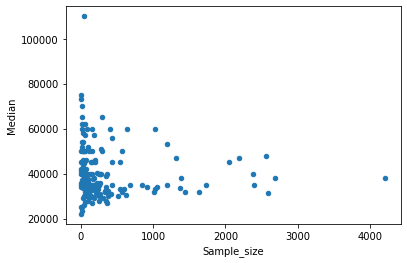

In [3]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

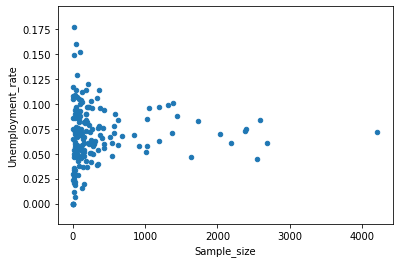

In [4]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

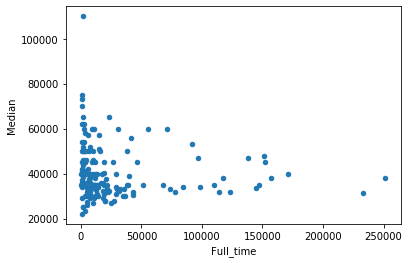

In [5]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

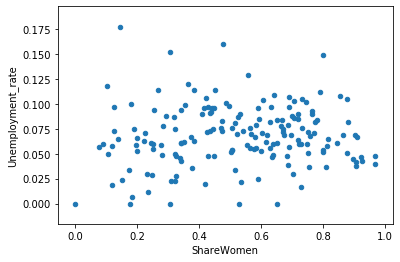

In [6]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

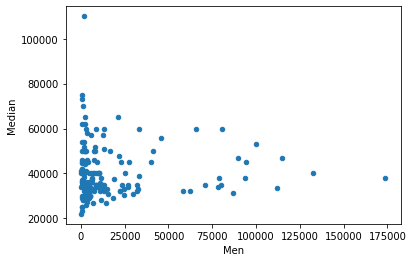

In [7]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

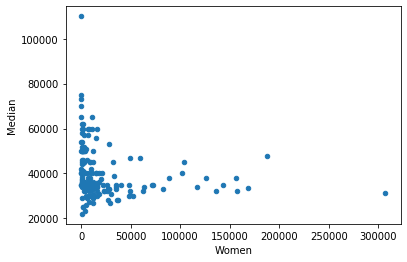

In [8]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

# Data exploration using histograms

To explore the distribution of values in a column, we can select it from the dataframe, call `Series.plot()`, and set the kind parameter to `hist`. 

I am going to generate histograms in two jupyter notebook cells to explore the distributions of the following columns:

- Sample_size
- Median
- Employed
- Full_time
- ShareWomen
- Unemployment_rate
- Men
- Women


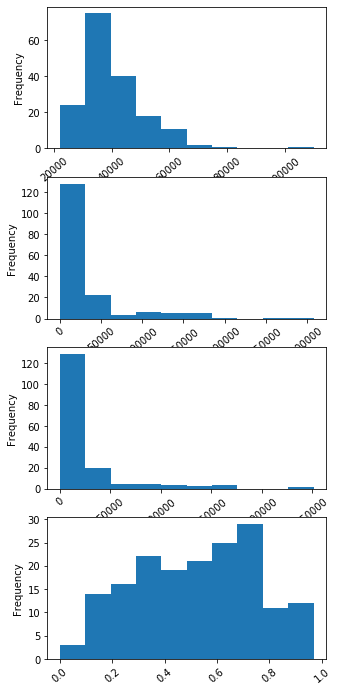

In [9]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

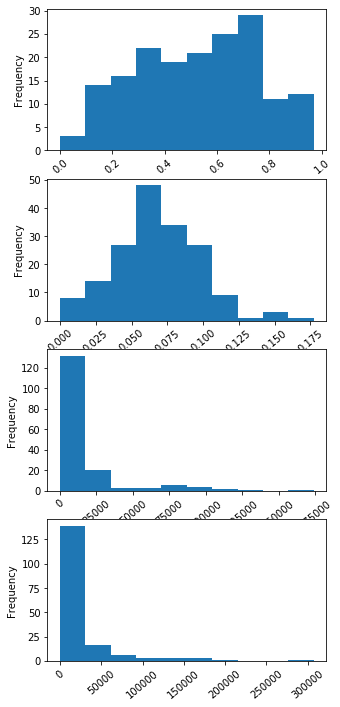

In [10]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

# Data exploration using scatter matrix plots

A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cc86250>,
      dtype=object)

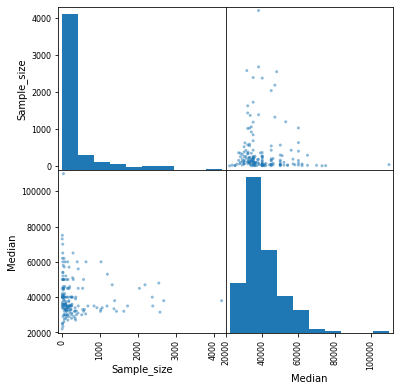

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cedf2d0>,
      dtype=object)

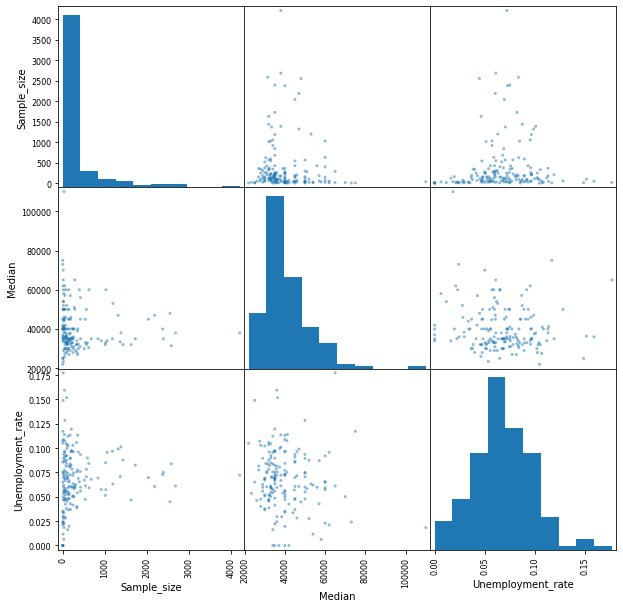

In [12]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

# Data exploration using bar plots

When creating bar plots using pandas we only need to specify the data we want the bars to represent and the labels for each bar.

I am going to use bar plots to compare the percentages of women (`ShareWomen`) from the first ten rows and last ten rows of the `recent_grads` dataframe.

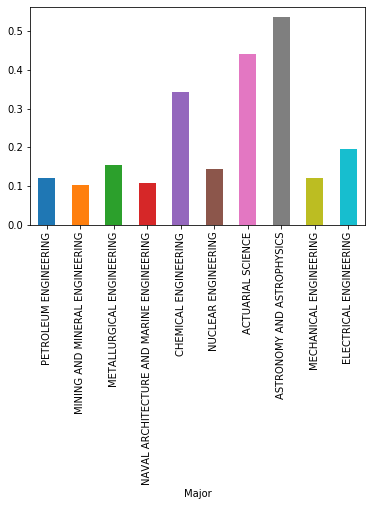

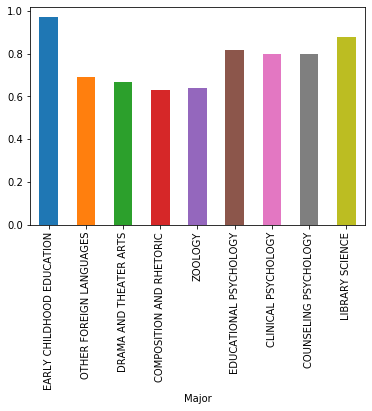

In [13]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])

Now I will use bar plots to compare the unemployment rate (`Unemployment_rate`) from the first ten rows and last ten rows of the `recent_grads` dataframe.

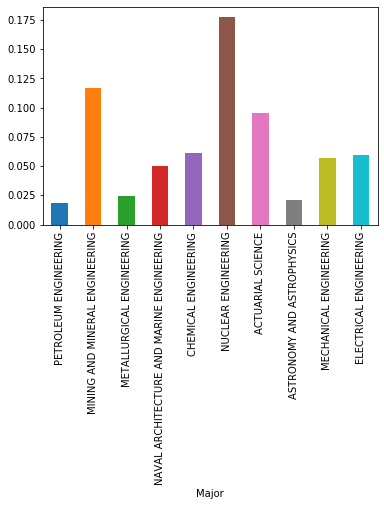

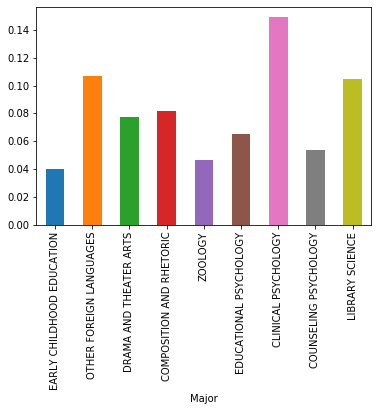

In [14]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])